In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
num_classes = 10 
num_features = 784 

learning_rate = 0.001 
training_steps = 3000 
batch_size = 256 
display_step = 100 

n_hidden_1 = 128 
n_hidden_2 = 256 

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation !=0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)

class NN(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1)
        self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2)
        self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes)

    def __call__(self, x):
        x1 = self.layer_1(x, activation=0)
        x2 = self.layer_2(x1, activation=0)
        x3 = self.layer_3(x2, activation=1)
        return x3

In [ ]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):
    acc = tf.metrics.Accuracy()
    acc.update_state(y_true, tf.argmax(y_pred, axis=1))
    return acc.result()

In [ ]:
neural_net = NN(name="mnist")

def train(nn, input_x, output_y):
  
    optimizer = tf.optimizers.SGD(learning_rate)

    with tf.GradientTape() as g:
        pred = neural_net(input_x)
        loss = cross_entropy(pred, output_y)
        
    # Створимо список параметрів, що оптимізуються.
        trainable_variables = nn.trainable_variables
    # Обчислимо за ними значення градієнта
        gradients = g.gradient(loss, trainable_variables)
    
    # Модифікуємо параметри
        optimizer.apply_gradients(zip(gradients, trainable_variables))

In [ ]:
# Тренування мережі

loss_history = [] 
accuracy_history = [] 

# У цьому циклі ми будемо проводити навчання нейронної мережі
# з тренувального датасету train_data вийміть випадкову підмножину, на якій
# відбудеться тренування. Використовуйте метод take, доступний для тренувального датасету.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    # Оновлюємо ваги нейронної мережі
    train(neural_net, batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        current_loss = cross_entropy(pred, batch_y)
        loss_history.append(current_loss)
        
        current_accuracy = accuracy(pred, batch_y)
        accuracy_history.append(current_accuracy)
        print(f"Step: {step}, Loss: {current_loss}, Accuracy: {current_accuracy}")

Step: 0, Loss: 2105.584228515625, Accuracy: 0.125
Step: 100, Loss: 319.1875, Accuracy: 0.6796875
Step: 200, Loss: 191.222412109375, Accuracy: 0.78125
Step: 300, Loss: 183.2975311279297, Accuracy: 0.8125
Step: 400, Loss: 184.42132568359375, Accuracy: 0.79296875
Step: 500, Loss: 115.69654083251953, Accuracy: 0.84765625
Step: 600, Loss: 153.66592407226562, Accuracy: 0.8515625
Step: 700, Loss: 98.17144775390625, Accuracy: 0.8828125
Step: 800, Loss: 113.56881713867188, Accuracy: 0.87109375
Step: 900, Loss: 120.83087158203125, Accuracy: 0.859375
Step: 1000, Loss: 146.11752319335938, Accuracy: 0.86328125
Step: 1100, Loss: 97.25056457519531, Accuracy: 0.875
Step: 1200, Loss: 109.88319396972656, Accuracy: 0.87890625
Step: 1300, Loss: 110.28564453125, Accuracy: 0.89453125
Step: 1400, Loss: 58.64521026611328, Accuracy: 0.9296875
Step: 1500, Loss: 62.12474060058594, Accuracy: 0.92578125
Step: 1600, Loss: 86.98712158203125, Accuracy: 0.87890625
Step: 1700, Loss: 105.20834350585938, Accuracy: 0.8710

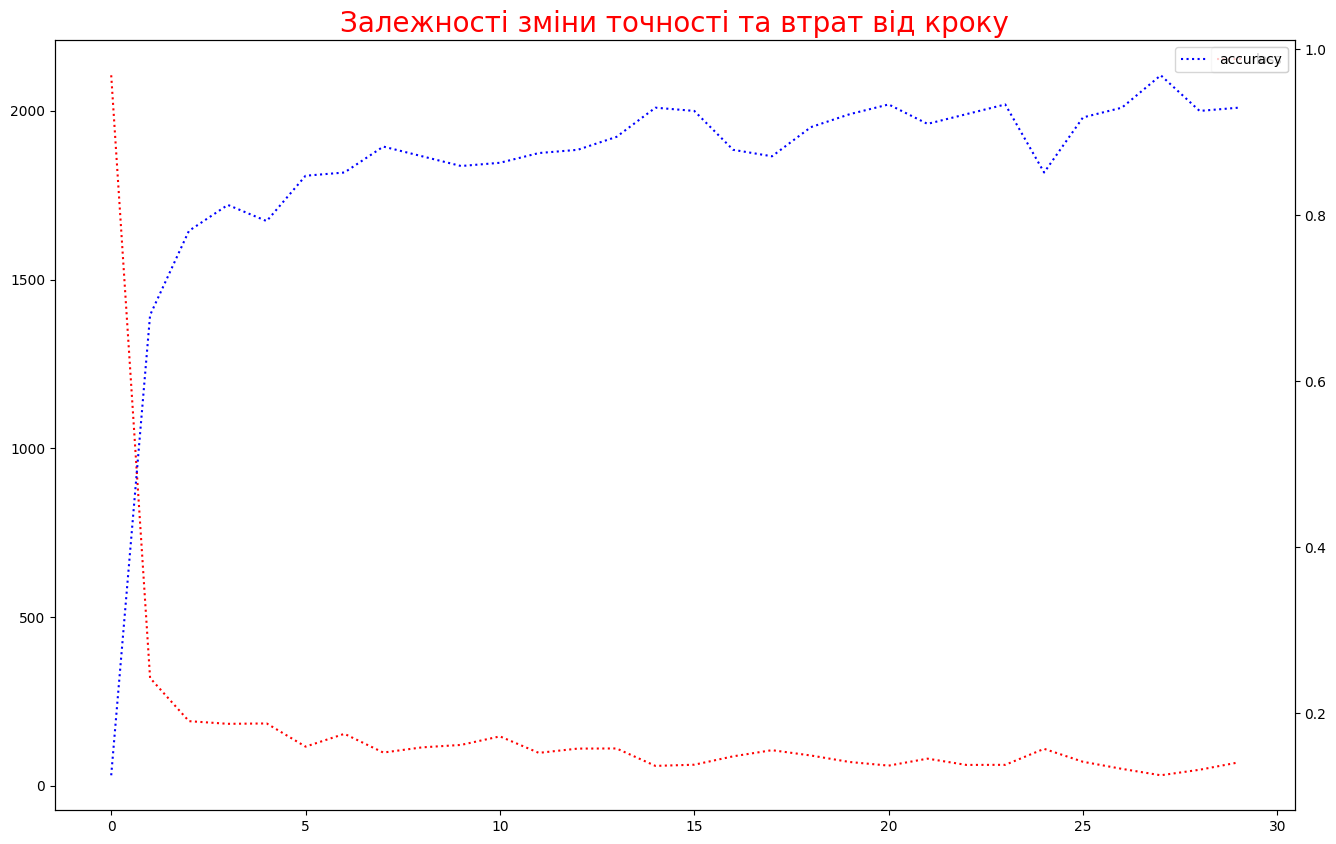

In [ ]:
# Виведіть графіки залежності зміни точності та втрат від кроку
# Якщо все зроблено правильно, то точність має зростати, а втрати зменшуватися
    
fig, axs = plt.subplots(figsize=(16, 10))
axs.plot(loss_history, 'r', label='loss', linestyle=":")
axs.legend()
axs2=axs.twinx()
axs2.plot(accuracy_history, 'b', label='accuracy', linestyle=":")
plt.legend()
    
plt.title('Залежності зміни точності та втрат від кроку', fontsize=20, color='r')
plt.show()

In [ ]:
# Обчисліть точність навченої нейромережі

neural_net_accuracy = accuracy(neural_net(x_train), y_train)
print(f"Accuracy: {neural_net_accuracy}")

Accuracy: 0.9231500029563904


True: 5 Predict: 5 True
True: 4 Predict: 4 True
True: 4 Predict: 8 False
True: 4 Predict: 4 True
True: 6 Predict: 6 True
True: 8 Predict: 8 True
True: 9 Predict: 9 True
True: 3 Predict: 3 True
True: 2 Predict: 2 True
True: 9 Predict: 9 True


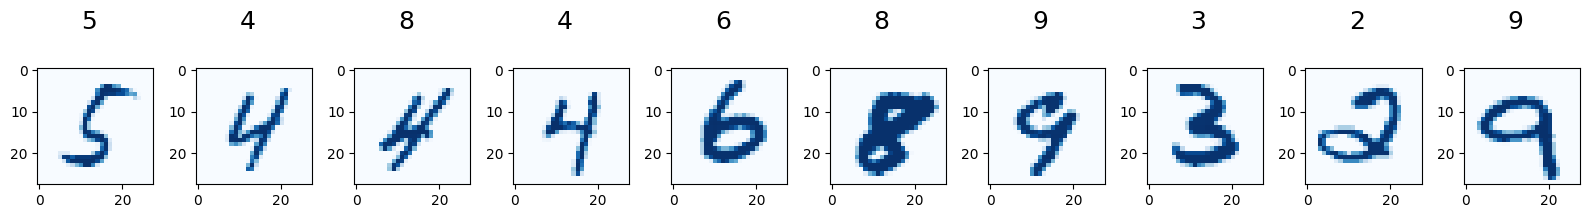

In [ ]:
# Протестуємо навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть поруч відповідь нейромережі.
test_img = np.random.permutation(x_test.shape[0])[:10]
y_test_true = y_test[test_img]
pred_data = [np.argmax(x) for x in neural_net(x_test[test_img])]
plt.figure(figsize=(16,6))
for i in range(10):
    print(f"True: {y_test_true[i]} Predict: {pred_data[i]} {True if y_test_true[i] - pred_data[i] == 0 else False}")
    plt.subplot(1, 10, (i + 1))
    plt.imshow(x_test[test_img[i]].reshape(28, 28), cmap='Blues')
    plt.text(x=10, y=-10, s=pred_data[i], fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Зробіть висновок про те, чи помиляється ваша нейронна мережа і якщо так, то як часто?
#Висновок можна зробити такий, точність моєї нейронної мережі складає 92%, в той час як я тестував нейронну мережу на 10 зображеннях, мережа помилилася на 4-му числі, і це єдина помилка мережі.